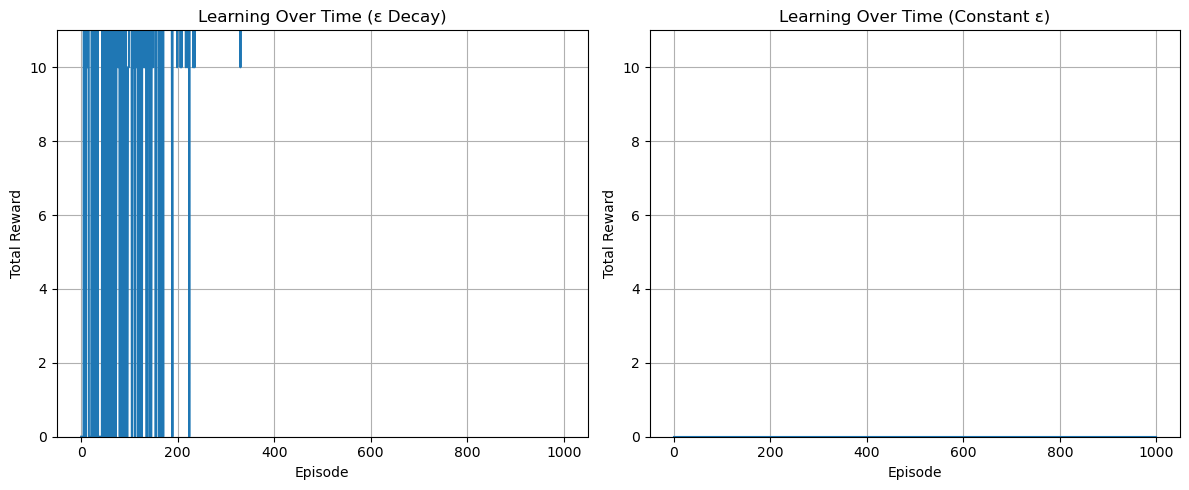

In [1]:
# epsilon_comparison.py

import random
import matplotlib.pyplot as plt

# -----------------------------
# FUNCTION TO RUN Q-LEARNING
# -----------------------------
def run_q_learning(epsilon, decay=False):
    q_table = {pos: {-1: 0.0, 1: 0.0} for pos in range(5)}
    visit_count = {pos: 0 for pos in range(5)}
    rewards = []

    alpha = 0.1
    gamma = 0.9
    epsilon_min = 0.01
    epsilon_decay = 0.995

    for episode in range(1000):
        position = 0
        total_reward = 0

        for step in range(10):
            if random.random() < epsilon:
                action = random.choice([-1, 1])
            else:
                action = max(q_table[position], key=q_table[position].get)

            new_position = max(0, min(position + action, 4))
            position = new_position

            reward = 10 if position == 4 else 0

            # Q-learning update
            old_position = position - action
            old_value = q_table[old_position][action]
            max_future = max(q_table[position].values())
            new_value = old_value + alpha * (reward + gamma * max_future - old_value)
            q_table[old_position][action] = new_value

            total_reward += reward

        rewards.append(total_reward)

        # Decay epsilon if enabled
        if decay and epsilon > epsilon_min:
            epsilon *= epsilon_decay

    return rewards

# -----------------------------
# RUN BOTH EXPERIMENTS
# -----------------------------
decay_rewards = run_q_learning(epsilon=1.0, decay=True)
constant_rewards = run_q_learning(epsilon=0.1, decay=False)

# -----------------------------
# PLOT COMPARISON
# -----------------------------
episodes = range(1000)

plt.figure(figsize=(12, 5))

# ε Decay
plt.subplot(1, 2, 1)
plt.plot(episodes, decay_rewards)
plt.title("Learning Over Time (ε Decay)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.ylim(0, 11)
plt.grid(True)

# Constant ε
plt.subplot(1, 2, 2)
plt.plot(episodes, constant_rewards)
plt.title("Learning Over Time (Constant ε)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.ylim(0, 11)
plt.grid(True)

plt.tight_layout()
plt.savefig("epsilon_comparison.png", dpi=300)
plt.show()